## Wind Power Generation Forecasting

### Problem Statement

Using the provided wind turbine dataset (with features such as Date/Time, Wind Speed, Wind Direction, Theoretical Power Curve, and LV Active Power), develop a forecasting model to predict future active power output (kW) of the wind turbine.

The goal is to use historical wind conditions (speed, direction) and theoretical power curves to estimate how much electricity the turbine will generate under given weather conditions. Additionally, the model should help identify the efficiency gap between theoretical and actual power generation, which can be used for performance monitoring and optimization.

### Importing The Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### DataSet Overview

* **Dataset Name** : **Wind Turbine Scada Dataset**
* **Source** : https://www.kaggle.com/datasets/berkerisen/wind-turbine-scada-dataset
* **File Format** : .csv

#### Feature Description
* **Date/Time** → Timestamp of the measurement (string, should be converted to datetime)
* **LV ActivePower (kW)** → Actual power generated by the wind turbine (target variable for forecasting)
* **Wind Speed (m/s)** → Wind speed at hub height (main driver of power generation)
* **Theoretical_Power_Curve (KWh)** → Ideal/theoretical power output based on turbine design and wind speed
* **Wind Direction (°)** → Wind direction in degrees (0–360), useful for analyzing turbine orientation effects

#### Loading the Dataset

In [ ]:
df = pd.read_csv("wind_power.csv")
print("Dataset shape:", df.shape)
df

Dataset shape: (50530, 5)


,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [ ]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [ ]:
df.info()       # check datatypes & non-null counts
df.describe()   # summary statistics
df.isnull().sum()  # missing values check


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

##### Converting DATE_TIME to datetime format

In [ ]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%d %m %Y %H:%M')

# Remove negative power values (replace with NaN, then fill with 0)
df['LV ActivePower (kW)'] = df['LV ActivePower (kW)'].apply(lambda x: np.nan if x < 0 else x)
df['LV ActivePower (kW)'] = df['LV ActivePower (kW)'].fillna(0)

# Create new time-based columns
df['Year'] = df['Date/Time'].dt.year
df['Month'] = df['Date/Time'].dt.month
df['Day'] = df['Date/Time'].dt.day
df['Hour'] = df['Date/Time'].dt.hour


## Exploring and Visualising the given Data


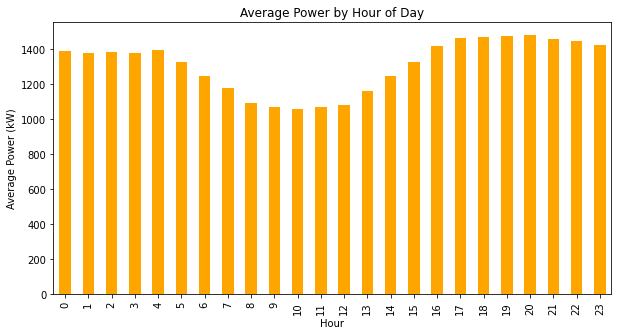

In [ ]:
# 1. Average Power per Hour of Day
hourly_avg = df.groupby('Hour')['LV ActivePower (kW)'].mean()
plt.figure(figsize=(10,5))
hourly_avg.plot(kind='bar', color="orange")
plt.title("Average Power by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Power (kW)")
plt.show()


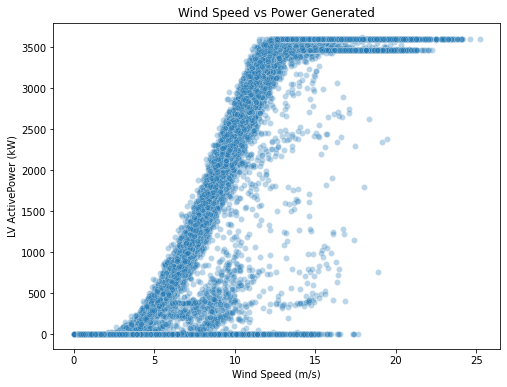

In [ ]:
# 2. Scatter plot: Wind Speed vs Power
plt.figure(figsize=(8,6))
sns.scatterplot(x="Wind Speed (m/s)", y="LV ActivePower (kW)", data=df, alpha=0.3)
plt.title("Wind Speed vs Power Generated")
plt.show()

In [ ]:
df['wind_category'] = pd.cut(df['Wind Speed (m/s)'], bins=[0,5,10,25], labels=['Low','Medium','High'])

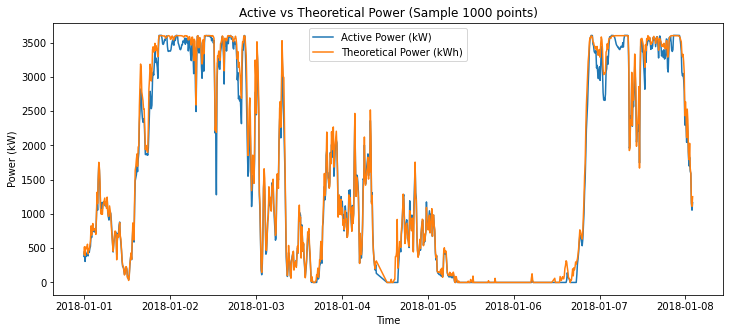

In [ ]:
# 3. Power vs Time (sample of 1000 points for clarity)
plt.figure(figsize=(12,5))
plt.plot(df['Date/Time'][:1000], df['LV ActivePower (kW)'][:1000], label="Active Power (kW)")
plt.plot(df['Date/Time'][:1000], df['Theoretical_Power_Curve (KWh)'][:1000], label="Theoretical Power (kWh)")
plt.xlabel("Time")
plt.ylabel("Power (kW)")
plt.title("Active vs Theoretical Power (Sample 1000 points)")
plt.legend()
plt.show()

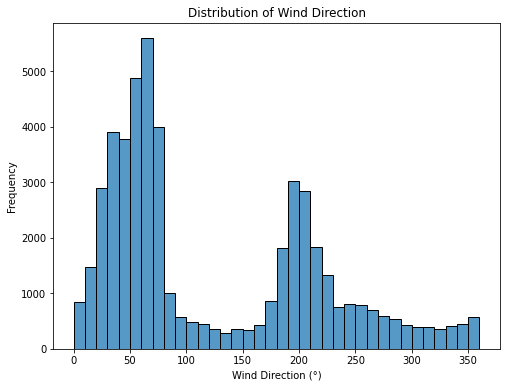

In [ ]:
# 4. Histogram of Wind Direction
plt.figure(figsize=(8,6))
sns.histplot(df['Wind Direction (°)'], bins=36, kde=False)
plt.title("Distribution of Wind Direction")
plt.xlabel("Wind Direction (°)")
plt.ylabel("Frequency")
plt.show()